In [1]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine, text
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [2]:
engine = create_engine("sqlite:///C:\\Users\\WaterDev\\Documents\\GitHub\\portfolio_main\\hockeyviewer\\db_temp\\db2.db")

In [3]:
query_people = 'SELECT * FROM players'
df_people = pd.read_sql_query(sql=text(query_people), con=engine.connect())
df_people["height_feet"] = df_people["height"].str.split("'").str[0].astype(int)
df_people["height_in"] = df_people["height"].str.split(" ").str[-1].str.replace("\"", "").astype(int)
df_people["height_calc"] = df_people["height_feet"]*12 + df_people["height_in"]

In [4]:
query_ppl_stats = 'SELECT * FROM playersTenStats'
df_ppl_stats = pd.read_sql_query(sql=text(query_ppl_stats), con=engine.connect())

In [5]:
df_people.columns

Index(['index', 'id', 'fullName', 'link', 'firstName', 'lastName',
       'primaryNumber', 'birthDate', 'currentAge', 'birthCity',
       'birthStateProvince', 'birthCountry', 'nationality', 'height', 'weight',
       'active', 'alternateCaptain', 'captain', 'rookie', 'shootsCatches',
       'rosterStatus', 'currentTeam.id', 'currentTeam.name',
       'currentTeam.link', 'primaryPosition.code', 'primaryPosition.name',
       'primaryPosition.type', 'primaryPosition.abbreviation', 'height_feet',
       'height_in', 'height_calc'],
      dtype='object')

In [6]:
df_people

index       id             fullName                    link  firstName  \
0        0  8473541     Jonathan Bernier  /api/v1/people/8473541   Jonathan   
1        0  8478406  Mackenzie Blackwood  /api/v1/people/8478406  Mackenzie   
2        0  8474090        Brendan Smith  /api/v1/people/8474090    Brendan   
3        0  8475193          Tomas Tatar  /api/v1/people/8475193      Tomas   
4        0  8475287           Erik Haula  /api/v1/people/8475287       Erik   
..     ...      ...                  ...                     ...        ...   
824      0  8479985          Cale Fleury  /api/v1/people/8479985       Cale   
825      0  8479987        Morgan Geekie  /api/v1/people/8479987     Morgan   
826      0  8480009        Eeli Tolvanen  /api/v1/people/8480009       Eeli   
827      0  8482665        Matty Beniers  /api/v1/people/8482665      Matty   
828      0  8482834        Jesper Froden  /api/v1/people/8482834     Jesper   

      lastName primaryNumber   birthDate  currentAge    birthCity  ...  \
0      Bernier            45  1988-08-07          34        Laval  ...   
1    Blackwood            29  1996-12-09          26  Thunder Bay  ...   
2        Smith             2  1989-02-08          34       Mimico  ...   
3        Tatar            90  1990-12-01          32        Ilava  ...   
4        Haula            56  1991-03-23          31         Pori  ...   
..         ...           ...         ...         ...          ...  ...   
824     Fleury             8  1998-11-19          24      Carlyle  ...   
825     Geekie            67  1998-07-20          24  Strathclair  ...   
826   Tolvanen            20  1999-04-22          23        Vihti  ...   
827    Beniers            10  2002-11-05          20      Hingham  ...   
828     Froden            38  1994-09-21          28    Stockholm  ...   

    currentTeam.id   currentTeam.name  currentTeam.link primaryPosition.code  \
0                1  New Jersey Devils   /api/v1/teams/1                    G   
1                1  New Jersey Devils   /api/v1/teams/1                    G   
2                1  New Jersey Devils   /api/v1/teams/1                    D   
3                1  New Jersey Devils   /api/v1/teams/1                    L   
4                1  New Jersey Devils   /api/v1/teams/1                    L   
..             ...                ...               ...                  ...   
824             55     Seattle Kraken  /api/v1/teams/55                    D   
825             55     Seattle Kraken  /api/v1/teams/55                    C   
826             55     Seattle Kraken  /api/v1/teams/55                    R   
827             55     Seattle Kraken  /api/v1/teams/55                    C   
828             55     Seattle Kraken  /api/v1/teams/55                    R   

     primaryPosition.name  primaryPosition.type  primaryPosition.abbreviation  \
0                  Goalie                Goalie                             G   
1                  Goalie                Goalie                             G   
2              Defenseman            Defenseman                             D   
3               Left Wing               Forward                            LW   
4               Left Wing               Forward                            LW   
..                    ...                   ...                           ...   
824            Defenseman            Defenseman                             D   
825                Center               Forward                             C   
826            Right Wing               Forward                            RW   
827                Center               Forward                             C   
828            Right Wing               Forward                            RW   

     height_feet  height_in height_calc  
0              6          0          72  
1              6          4          76  
2              6          2          74  
3              5         10          70  
4              5       

In [7]:
df = df_ppl_stats.merge(df_people, left_on='person.id', right_on='id')
df

index_x    season stat.timeOnIce  stat.assists  stat.goals  stat.pim  \
0           0  20122013         839:04          21.0        15.0      72.0   
1           0  20132014        1577:59          39.0        43.0      65.0   
2           0  20142015        1212:45          22.0        33.0      67.0   
3           0  20152016        1452:02          28.0        34.0      68.0   
4           0  20162017        1452:42          34.0        19.0      76.0   
...       ...       ...            ...           ...         ...       ...   
4633        0  20212022         322:24           3.0         3.0       4.0   
4634        0  20212022          05:49           0.0         0.0       0.0   
4635        0  20212022         222:48           5.0         0.0       4.0   
4636        0  20212022          43:15           0.0         0.0       2.0   
4637        0  20212022         254:40           5.0         2.0       0.0   

      stat.shots  stat.games  stat.hits  stat.powerPlayGoals  ...  \
0          128.0        44.0       49.0                  5.0  ...   
1          280.0        81.0       81.0                  8.0  ...   
2          193.0        67.0       64.0                  4.0  ...   
3          215.0        82.0      104.0                 12.0  ...   
4          215.0        82.0       81.0                  5.0  ...   
...          ...         ...        ...                  ...  ...   
4633        45.0        36.0       16.0                  0.0  ...   
4634         1.0         1.0        0.0                  0.0  ...   
4635        14.0        15.0       21.0                  0.0  ...   
4636         7.0         4.0        0.0                  0.0  ...   
4637        21.0        18.0       17.0                  0.0  ...   

      currentTeam.id     currentTeam.name  currentTeam.link  \
0                 14  Tampa Bay Lightning  /api/v1/teams/14   
1                 14  Tampa Bay Lightning  /api/v1/teams/14   
2                 14  Tampa Bay Lightning  /api/v1/teams/14   
3                 14  Tampa Bay Lightning  /api/v1/teams/14   
4                 14  Tampa Bay Lightning  /api/v1/teams/14   
...              ...                  ...               ...   
4633              24        Anaheim Ducks  /api/v1/teams/24   
4634              14  Tampa Bay Lightning  /api/v1/teams/14   
4635              52        Winnipeg Jets  /api/v1/teams/52   
4636               8   Montréal Canadiens   /api/v1/teams/8   
4637              52        Winnipeg Jets  /api/v1/teams/52   

     primaryPosition.code  primaryPosition.name  primaryPosition.type  \
0                       R            Right Wing               Forward   
1                       R            Right Wing               Forward   
2                       R            Right Wing               Forward   
3                       R            Right Wing               Forward   
4                       R            Right Wing               Forward   
...                   ...                   ...                   ...   
4633                    R            Right Wing               Forward   
4634                    C                Center               Forward   
4635                    D            Defenseman            Defenseman   
4636                    D            Defenseman            Defenseman   
4637                    C                Center               Forward   

      primaryPosition.abbreviation  height_feet  height_in  height_calc  
0                               RW            6          3           75  
1                               RW            6          3           75  
2                               RW            6          3           75  
3                               RW            6          3           75  
4                               RW            6          3           75  
...                            ...          ...        ...          ...  
4633                            RW            6          5           77  
4634          

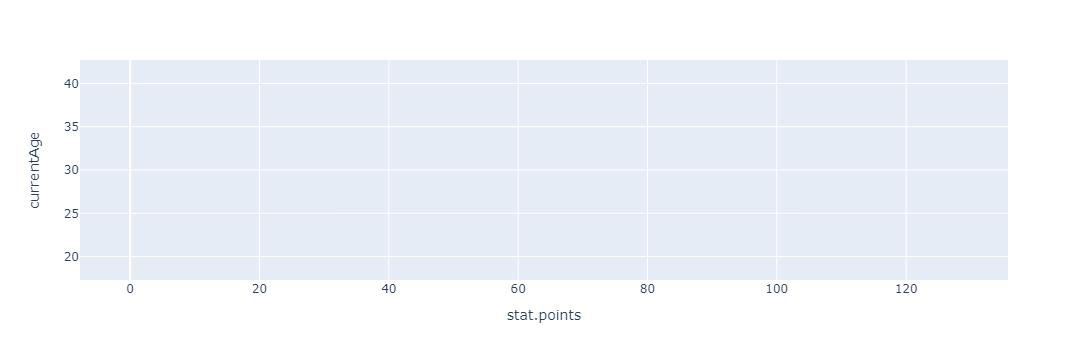

In [8]:
px.scatter(df, x='stat.points', y='currentAge')

In [9]:
df['ppg'] = df['stat.points']/df['stat.games']

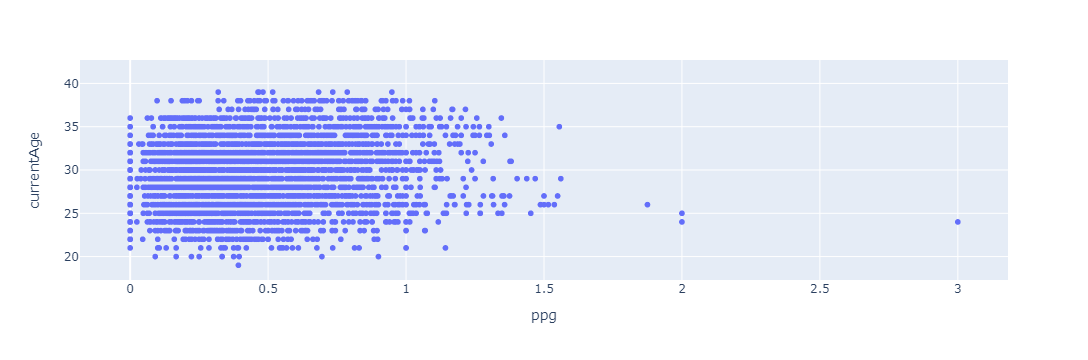

In [10]:
px.scatter(df, x='ppg', y='currentAge')

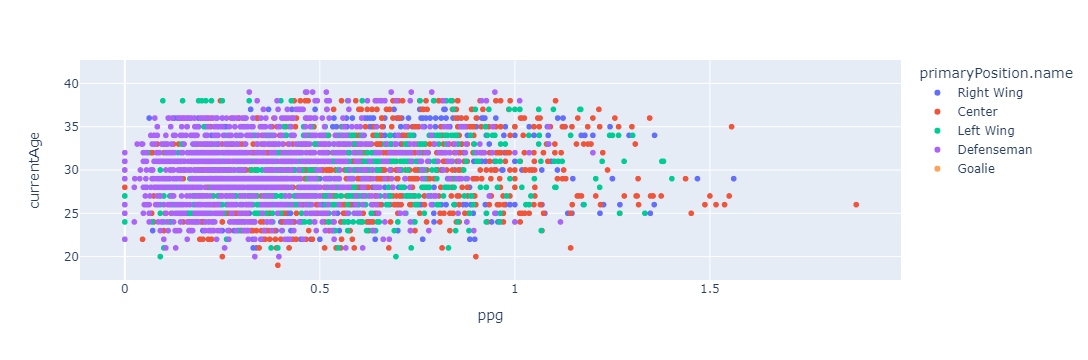

In [32]:
# remove data of games played <10
df_10 = df[df['stat.games'] >= 10]
# offense players only
#df_10_off = df_10[~df_10['primaryPosition.name'].isin(['Defenseman', 'Goalie'])]
px.scatter(df_10, x='ppg', y='currentAge', color='primaryPosition.name')

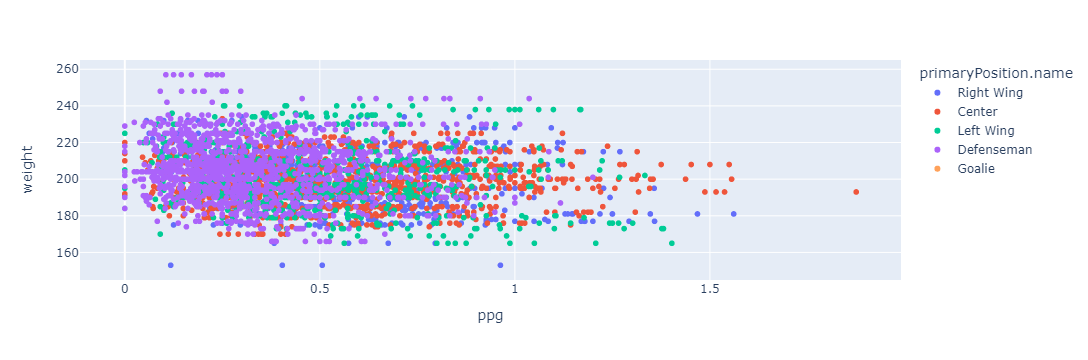

In [12]:
px.scatter(df_10, x='ppg', y='weight', color='primaryPosition.name')

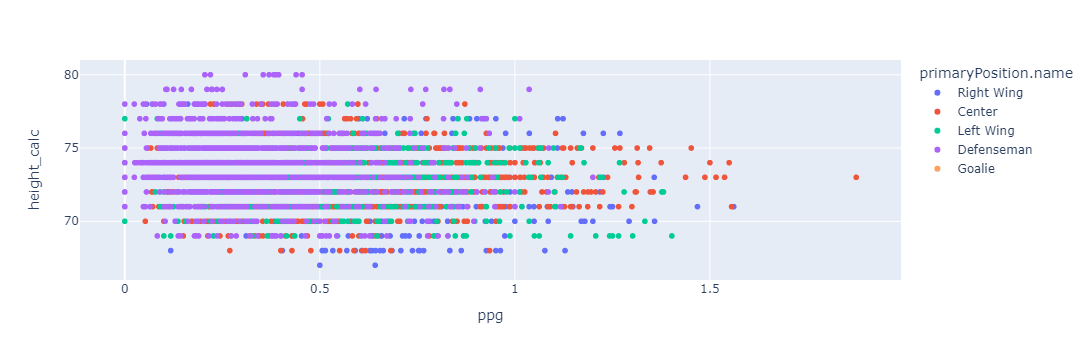

In [13]:
px.scatter(df_10, x='ppg', y='height_calc', color='primaryPosition.name')

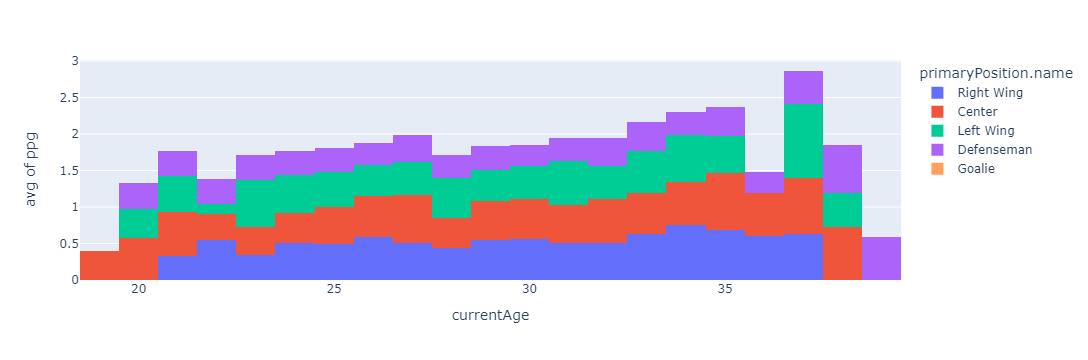

In [14]:
px.histogram(df_10, x="currentAge", y='ppg', histfunc='avg', color='primaryPosition.name')

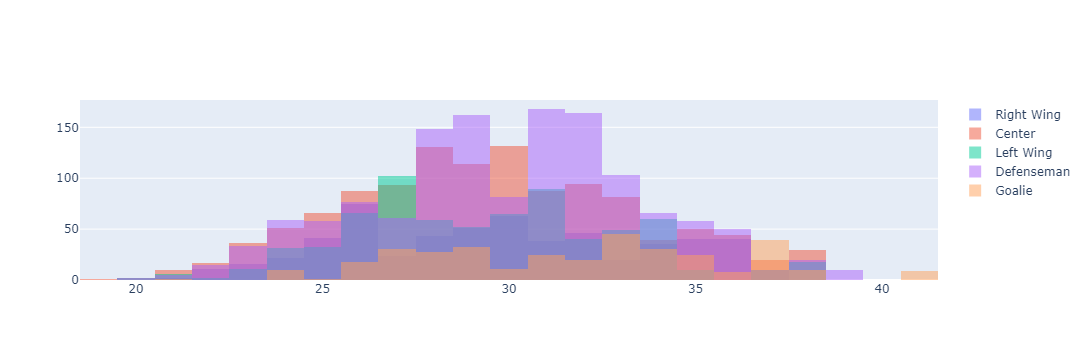

In [15]:
import plotly.graph_objects as go

import numpy as np

fig = go.Figure()
for pos in df_10['primaryPosition.name'].unique():
    df_10_pos = df_10[df_10['primaryPosition.name'] == pos]
    fig.add_trace(go.Histogram(x=df_10_pos['currentAge'], y=df_10_pos['ppg'], name=pos))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

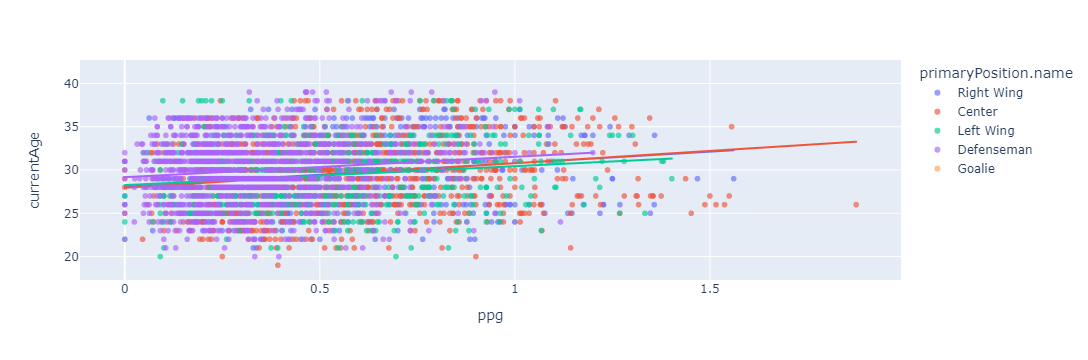

In [16]:
fig = px.scatter(
    df_10, x="ppg", y='currentAge', color='primaryPosition.name', opacity=0.65,
    trendline='ols'
)
fig.show()

In [17]:
# add bmi col
df_10['bmi'] = (df_10['weight'].astype(int) / df_10['height_calc'].astype(int) / df_10['height_calc'].astype(int))*703

C:\Users\WaterDev\AppData\Local\Temp\ipykernel_16964\2647565947.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



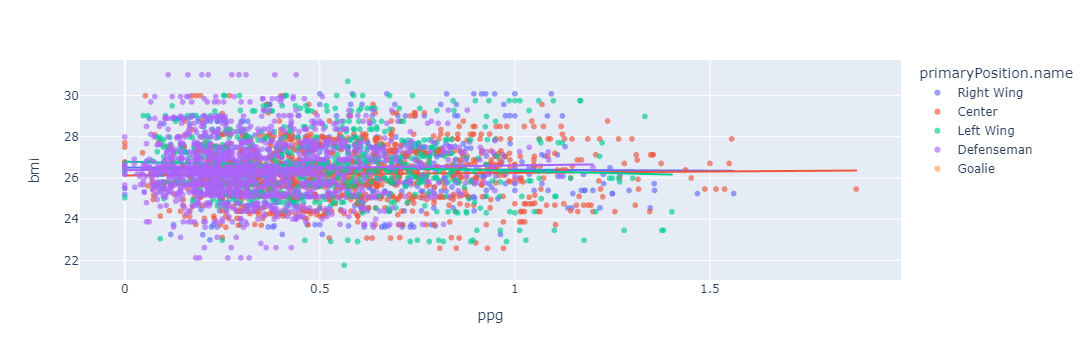

In [18]:
fig = px.scatter(
    df_10, x="ppg", y='bmi', color='primaryPosition.name', opacity=0.65,
    trendline='ols'
)
fig.show()

In [19]:
df_10['weight']

0       208
1       208
2       208
3       208
4       208
       ... 
4630    189
4632    176
4633    218
4635    219
4637    184
Name: weight, Length: 4159, dtype: int64

In [20]:
df_10['height_calc']

0       75
1       75
2       75
3       75
4       75
        ..
4630    73
4632    69
4633    77
4635    76
4637    71
Name: height_calc, Length: 4159, dtype: int32

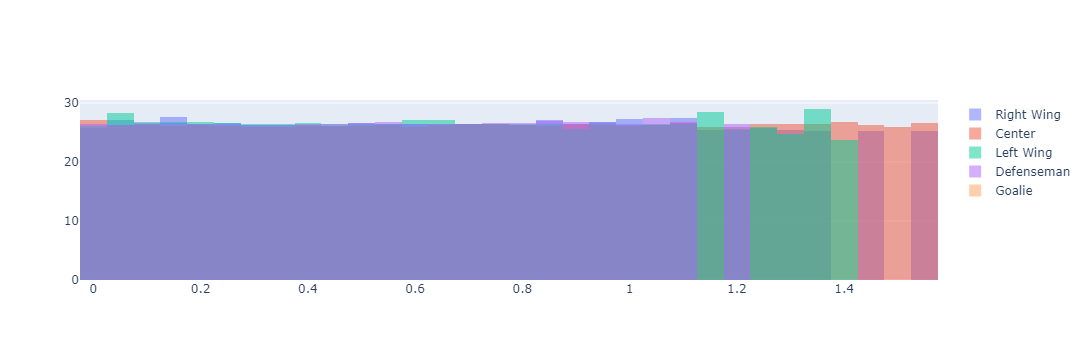

In [21]:
fig = go.Figure()
for pos in df_10['primaryPosition.name'].unique():
    df_10_pos = df_10[df_10['primaryPosition.name'] == pos]
    fig.add_trace(go.Histogram(x=df_10_pos['ppg'], y=df_10_pos['bmi'], name=pos, histfunc='avg'))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [22]:
bmi_limits = [0, 22.5, 24, 25.5, np.inf]
bmi_bins=pd.cut(df_10['bmi'], bins=bmi_limits, right=False)
bmi_bins
#px.box(df_10, x='bmi', y='ppg', color='primaryPosition.name')

0        [25.5, inf)
1        [25.5, inf)
2        [25.5, inf)
3        [25.5, inf)
4        [25.5, inf)
            ...     
4630    [24.0, 25.5)
4632     [25.5, inf)
4633     [25.5, inf)
4635     [25.5, inf)
4637     [25.5, inf)
Name: bmi, Length: 4159, dtype: category
Categories (4, interval[float64, left]): [[0.0, 22.5) < [22.5, 24.0) < [24.0, 25.5) < [25.5, inf)]

C:\Users\WaterDev\AppData\Local\Temp\ipykernel_16964\2230082720.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



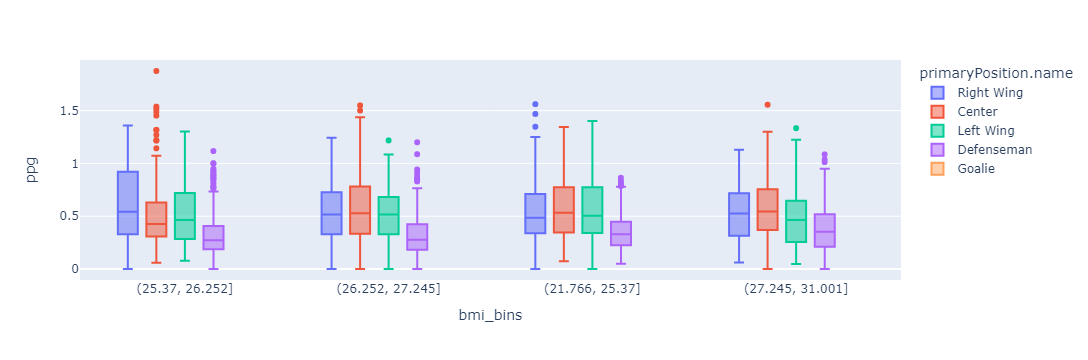

In [29]:
df_10['bmi_bins'] = pd.qcut(df_10['bmi'], 4).astype(str)
px.box(df_10, x='bmi_bins', y='ppg', color='primaryPosition.name')